# Lista 1 de Otimização Natural

### Questão 1) Calcular $\int_{0}^{1} xe^{-x} dx$

#### a) integração por partes

In [740]:
from sympy import *
x = Symbol('x')

eq1 = x*exp(-x)

In [741]:
resposta = integrate(eq1, (x, 0, 1))
resposta

-2*exp(-1) + 1

In [742]:
N(resposta)

0.264241117657115

#### b) pelo método de monte carlo, usando 10 números escolhidos aleatoriamente com densidade uniforme entre 0 e 1;

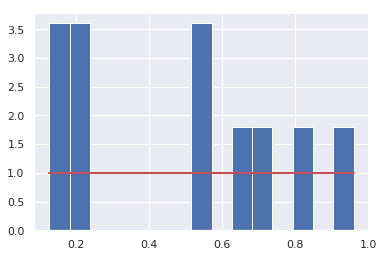

0.2634606484025901

In [843]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

s = np.random.uniform(0,1,10)

count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

sum(s*np.exp(-s))/len(s)

In [845]:
s

array([0.66606563, 0.1280393 , 0.15019057, 0.53518197, 0.72382377,
       0.56306944, 0.18701318, 0.96037606, 0.79777229, 0.23135354])

#### c) pelo método de monte carlo, usando 10 números escolhidos aleatoriamente com densidade exponencial entre 0 e 1;

In [912]:
numero_amostras = 10
numeros_possiveis = np.array([])
while len(numeros_possiveis) < 10:
    q = np.random.exponential(1)
    if (q <= 1):
        numeros_possiveis = np.append(numeros_possiveis,q)

    
#  # PDF plot
# count, bins, ignored = plt.hist(numeros_possiveis, 15, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
# plt.show()

# Calculo da integral
sum(numeros_possiveis*np.exp(-numeros_possiveis))/len(numeros_possiveis)

0.2632015424851588

In [913]:
numeros_possiveis

array([0.55005713, 0.39015194, 0.23349916, 0.41284879, 0.22265732,
       0.69167714, 0.43932533, 0.09646257, 0.60023859, 0.98892791])

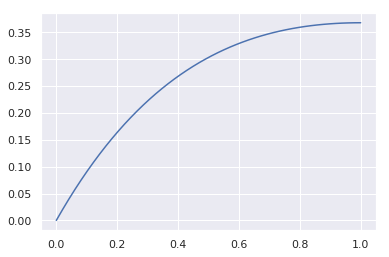

In [737]:
#plot da função que está sendo integrada
pts = np.linspace(0,1);

queisso = pts*np.exp(-pts)

import seaborn as sns
sns.set(style="darkgrid")

sns.lineplot(pts,queisso)
plt.show()

### Questão 2) 

Usando N = 20 números aleatórios, escolhidos a partir de uma p.d.f. uniforme entre -1 e +1, calcular uma aproximação para o número $\pi$ pelo método de Monte Carlo. Faça o mesmo no computador, utilizando um valor alto para N (por exemplo, 1.000.000). Comente o resultado.


A aproximação: $\int_{-1}^{1} \frac{dx}{\sqrt{1-x^{2}}}$

In [743]:
# avaliando a integral indefinida
eq1 = 1/sqrt(1-x**2)
limite_inf = -1
limite_sup = 1

resposta = integrate(eq1, (x, limite_inf, limite_sup))
resposta

pi

#### Com N = 20

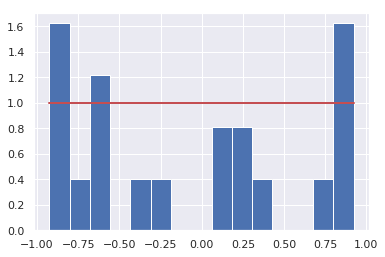

avaliando a integral pra achar pi, o valor é 3.1428439989214505


array([-0.85289404,  0.92237068,  0.32455622,  0.0946911 ,  0.8676302 ,
       -0.92568284,  0.76944606, -0.90241725,  0.20247619, -0.69989244,
       -0.64724326,  0.91118243,  0.2354838 ,  0.8327723 , -0.21647745,
       -0.5894811 , -0.81595565, -0.61292112,  0.12647561, -0.33242752])

In [765]:
s = np.random.uniform(-1,1,20)

# histograma dos valores de s
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

print(f'avaliando a integral pra achar pi, o valor é {sum(1/(np.sqrt(1-s**2))) * 1/len(s) * 2}')

s

#### Com N = 10**7

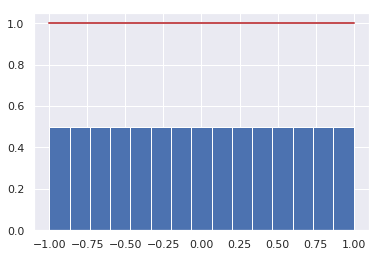

avaliando a integral pra achar pi, o valor é 3.1440553697567846


In [916]:
s = np.random.uniform(-1,1,10**7)

# histograma dos valores de s
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

print(f'avaliando a integral pra achar pi, o valor é {sum(1/(np.sqrt(1-s**2))) * 1/len(s) * 2}')

#### Plotando o gráfico da função $\frac{1}{\sqrt{1-x^{2}}}$

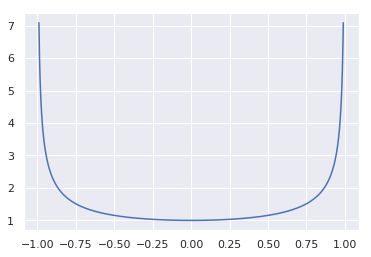

In [766]:
pts = np.linspace(-0.99,0.99,1000);

queisso = 1/(np.sqrt(1-(pts**2)))

sns.lineplot(pts,queisso)
plt.show()

### Questão 3) 

Escrever um algoritmo para gerar números $x(n)$ com energia $J(x) = x^{2}$, de forma que as probabilidades dos números gerados sejam proporcionais aos fatores de Boltzmann $e^{-J(x)/T}$, com temperatura $T = 0.1$. Começando de um valor $x(0)$ qualquer, aplique sempre perturbações $\epsilon R$ ao valor $x(n)$ atual. Neste caso, R é uma vriável aleatória uniforme. Considere $\epsilon = 0.1$.

a) Execute o algoritmo proposto no computador, calculando $x(n)$ até $n = 100.000$.

b) Execute manualmente os 10 primeiros passos do algoritmo.

In [767]:
from scipy.optimize import fmin

def funcao_J(x):
    return x**2

x_inicial = np.array(0)
fmin(funcao_J,x_inicial)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6


array([0.])

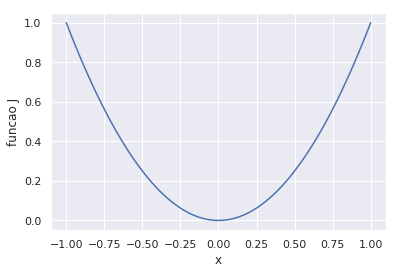

In [768]:
# Plot da função J
pt_inicial = -1
pt_final = 1
amostras = 100
x = np.linspace(pt_inicial, pt_final, amostras)
y = funcao_J(x)
sns.lineplot(x,y)
plt.xlabel('x')
plt.ylabel('funcao J')
plt.show()

#### a) Execute no computador, calculando x(n) até n = 100.000

In [769]:
x_inicial = np.array(0)

J_inicial = funcao_J(x_inicial)
x_atual = x_inicial
J_atual = J_inicial

# Parâmetros utilizados
N = 10**5
T_inicial = 0.1
T = T_inicial
epsilon = 0.1

fim = 0
n = 0
k = 1
J_min = J_atual
x_min = x_atual

todos_J = np.array([])
todos_x = np.array([])

In [770]:
while not(fim):
    n = n + 1
    x = x_atual + epsilon*(np.random.normal(0, 1))
    J = funcao_J(x)
    todos_J = np.append(todos_J,J)
    todos_x = np.append(todos_x,x)
    if (np.random.uniform(0,1) < np.exp((J_atual-J)/T)):
        x_atual = x
        J_atual = J
    if (J < J_min):
        J_min = J
        x_min = x
    if (n % N == 0):
        fim = 1

In [771]:
print(f'O x min é {x_min}, e a qtd de x gerados foi de {len(todos_x)}')

O x min é 0, e a qtd de x gerados foi de 100000


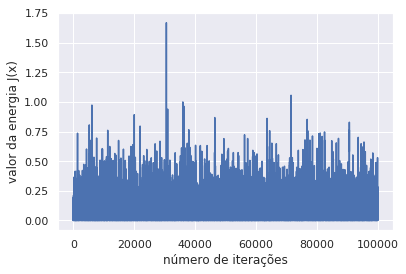

In [772]:
pts = np.arange(1,n+1);

# plot das iterações de J
sns.lineplot(pts,todos_J)
plt.xlabel('número de iterações')
plt.ylabel('valor da energia J(x)')
plt.show()

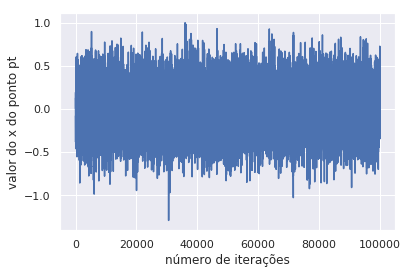

In [774]:
# plot das iterações de x do ponto pt
sns.lineplot(pts,todos_x)
plt.xlabel('número de iterações')
plt.ylabel('valor do x do ponto pt')
plt.show()

#### b) Execute na mão os dez primeiros passos

In [820]:
x_inicial = np.array(0)

J_inicial = funcao_J(x_inicial)
x_atual = x_inicial
J_atual = J_inicial

# Parâmetros utilizados
N = 10
T_inicial = 0.1
T = T_inicial
epsilon = 0.1

fim = 0
n = 0
k = 1
J_min = J_atual
x_min = x_atual

todos_J = np.array([])
todos_x = np.array([])

In [821]:
for i in range(1,11):
    print(f'{i} ITERAÇÃO')
    n = n + 1
    print(f'valor de n é {n}')
    x = x_atual + epsilon*(np.random.normal(0, 1))
    print(f'x_atual = {x_atual}, novo x com ruido x = {x}')
    J = funcao_J(x)
    print(f'avaliando a funcao J, J = {J}')
    if (np.random.uniform(0,1) < np.exp((J_atual-J)/T)):
        x_atual = x
        J_atual = J
    print(f'No teste de comparação com a variável uniforme r, o teste foi {(np.random.uniform(0,1) < np.exp((J_atual-J)/T))}')
    print(f'Então no momento, o x_atual é {x_atual}, e o J_atual é {J_atual}')
    #if (J < J_min):
    #    J_min = J
    #    x_min = x
    #print(f'No teste de comparação com J min, o teste foi {(J < J_min)}')
    #print(f'Então no momento, o x_min é {x_min}, e o J_min é {J_min}')

1 ITERAÇÃO
valor de n é 1
x_atual = 0, novo x com ruido x = 0.1067022036958739
avaliando a funcao J, J = 0.011385360273555765
No teste de comparação com a variável uniforme r, o teste foi True
Então no momento, o x_atual é 0.1067022036958739, e o J_atual é 0.011385360273555765
2 ITERAÇÃO
valor de n é 2
x_atual = 0.1067022036958739, novo x com ruido x = 0.10880707655104349
avaliando a funcao J, J = 0.011838979907584639
No teste de comparação com a variável uniforme r, o teste foi True
Então no momento, o x_atual é 0.10880707655104349, e o J_atual é 0.011838979907584639
3 ITERAÇÃO
valor de n é 3
x_atual = 0.10880707655104349, novo x com ruido x = 0.16719018215035383
avaliando a funcao J, J = 0.027952557007468494
No teste de comparação com a variável uniforme r, o teste foi True
Então no momento, o x_atual é 0.16719018215035383, e o J_atual é 0.027952557007468494
4 ITERAÇÃO
valor de n é 4
x_atual = 0.16719018215035383, novo x com ruido x = 0.10910927052266203
avaliando a funcao J, J = 0.0

In [783]:
print(f'Nos parâmetros atuais temos: n = {n}, x_atual = {x_atual}, x = {x}, J = {J}')

Nos parâmetros atuais temos: n = 0, x_atual = 0, x = -0.07746223120961526, J = 0.006000397263971893


### Questão 4) 

Escrever um programa de S.A. (pode ser pseudo-código) para minimizar a função escalar $J(x) = -x + 100(x - 0.2)^{2}(x-0.8)^{2}$. Começando de $x(0) = 0$ e utilizando geradores de números aleatórios (um uniforme e outro gaussiano), calcule manualmente os 10 primeiros valores de $x(n)$ gerados pelo S.A.

In [378]:
def funcao_J(x):
    return -x + 100*((x-0.2)**2)*((x-0.8)**2)

x_inicial = np.array(0)
fmin(funcao_J,x_inicial)

Optimization terminated successfully.
         Current function value: -0.207300
         Iterations: 20
         Function evaluations: 40


array([0.215])

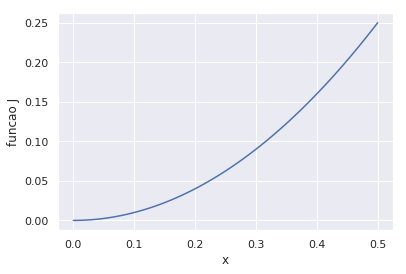

In [822]:
# Plot da função J
pt_inicial = 0
pt_final = 0.5
amostras = 100
x = np.linspace(pt_inicial, pt_final, amostras)
y = funcao_J(x)
sns.lineplot(x,y)
plt.xlabel('x')
plt.ylabel('funcao J')
plt.show()

In [823]:
x_inicial = np.array(0)

J_inicial = funcao_J(x_inicial)
x_atual = x_inicial
J_atual = J_inicial

# Parâmetros utilizados
N = 1000 
K = 8
T_inicial = 5e-3
T = T_inicial
epsilon = 10e-2

fim = 0
n = 0
k = 1
J_min = J_atual
x_min = x_atual

todos_J = np.array([])
todos_x = np.array([])

In [398]:
while not(fim):
    n = n + 1
    x = x_atual + epsilon*(np.random.normal(0, 1))
    J = funcao_J(x)
    todos_J = np.append(todos_J,J)
    todos_x = np.append(todos_x,x)
    if (np.random.uniform(0,1) < np.exp((J_atual-J)/T)):
        x_atual = x
        J_atual = J
    if (J < J_min):
        J_min = J
        x_min = x
    if (n % N == 0):
        k = k + 1
        T = T_inicial/(np.log(1+k))
        if k == K:
            fim = 1

x_min

0.21497831799003195

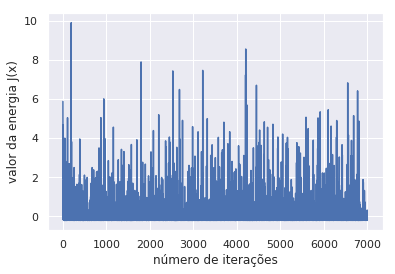

In [399]:
pts = np.arange(1,n+1);

# plot das iterações de J
sns.lineplot(pts,todos_J)
plt.xlabel('número de iterações')
plt.ylabel('valor da energia J(x)')
plt.show()

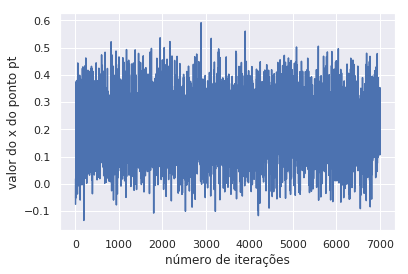

In [400]:
# plot das iterações de x do ponto pt
sns.lineplot(pts,todos_x)
plt.xlabel('número de iterações')
plt.ylabel('valor do x do ponto pt')
plt.show()

#### Cálculo Manual

In [824]:
for i in range(1,11):
    print(f'{i} ITERAÇÃO')
    n = n + 1
    print(f'valor de n é {n}')
    x = x_atual + epsilon*(np.random.normal(0, 1))
    print(f'x_atual = {x_atual}, novo x com ruido x = {x}')
    J = funcao_J(x)
    print(f'avaliando a funcao J, J = {J}')
    if (np.random.uniform(0,1) < np.exp((J_atual-J)/T)):
        x_atual = x
        J_atual = J
    print(f'No teste de comparação com a variável uniforme r, o teste foi {(np.random.uniform(0,1) < np.exp((J_atual-J)/T))}')
    print(f'Então no momento, o x_atual é {x_atual}, e o J_atual é {J_atual}')
    #if (J < J_min):
    #    J_min = J
    #    x_min = x
    #print(f'No teste de comparação com J min, o teste foi {(J < J_min)}')
    #print(f'Então no momento, o x_min é {x_min}, e o J_min é {J_min}')

1 ITERAÇÃO
valor de n é 1
x_atual = 0, novo x com ruido x = -0.061798541979389665
avaliando a funcao J, J = 0.003819059790778387
No teste de comparação com a variável uniforme r, o teste foi True
Então no momento, o x_atual é -0.061798541979389665, e o J_atual é 0.003819059790778387
2 ITERAÇÃO
valor de n é 2
x_atual = -0.061798541979389665, novo x com ruido x = -0.06133334439715344
avaliando a funcao J, J = 0.0037617791349398334
No teste de comparação com a variável uniforme r, o teste foi True
Então no momento, o x_atual é -0.06133334439715344, e o J_atual é 0.0037617791349398334
3 ITERAÇÃO
valor de n é 3
x_atual = -0.06133334439715344, novo x com ruido x = -0.15356523524927124
avaliando a funcao J, J = 0.023582281477164017
No teste de comparação com a variável uniforme r, o teste foi False
Então no momento, o x_atual é -0.06133334439715344, e o J_atual é 0.0037617791349398334
4 ITERAÇÃO
valor de n é 4
x_atual = -0.06133334439715344, novo x com ruido x = -0.11991487875624554
avaliando

### Questão 5) 

Proponha uma função de até 4 variáveis cujo ponto mínimo você conheça, e encontre este ponto mínimo utilizando S.A. (neste exercício, basta entregar o código escrito).

A função escolhida:
$$f(x,y) = (x-3)^{2} + xy + (y-1)^{2}$$

Plot da função:

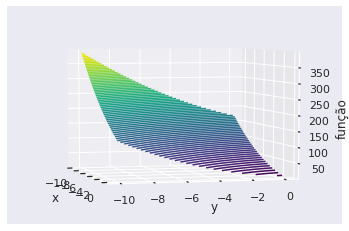

In [532]:
from mpl_toolkits import mplot3d

y = np.linspace(-10, 0.1, 40)
x = np.linspace(-10, 0.1, 40)

X, Y = np.meshgrid(x, y)
Z = (X-3)**2 + X*Y + (Y-1)**2

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 90, cmap='viridis')
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('função')
ax.view_init(5, -15) #elevation and azimuthal angles
plt.show()

In [324]:
def chosen_function(pt):
    x = pt[0]
    y = pt[1]
    return (x-3)**2 + x*y + (y-1)**2

pt_inicial = np.array([0,0])
fmin(chosen_function,pt_inicial)

Optimization terminated successfully.
         Current function value: 0.666667
         Iterations: 71
         Function evaluations: 136


array([ 3.33332673, -0.66667657])

In [316]:
J_inicial = chosen_function(pt_inicial)
pt_atual = pt_inicial
J_atual = J_inicial

# Parâmetros utilizados
N = 1000 
K = 8
T_inicial = 5e-1
T = T_inicial
epsilon = 10e-2

fim = 0
n = 0
k = 1
J_min = J_atual
pt_min = pt_atual

todos_J = np.array([])
todos_x_pt = np.array([])
todos_y_pt = np.array([])

In [317]:
while not(fim):
    n = n + 1
    pt = pt_atual + epsilon*(np.random.normal(0, 1, 2))
    J = chosen_function(pt)
    todos_J = np.append(todos_J,J)
    todos_x_pt = np.append(todos_x_pt,pt[0])
    todos_y_pt = np.append(todos_y_pt,pt[1])
    if (np.random.uniform(0,1) < np.exp((J_atual-J)/T)):
        pt_atual = pt
        J_atual = J
    if (J < J_min):
        J_min = J
        pt_min = pt
    if (n % N == 0):
        k = k + 1
        T = T_inicial/(np.log(1+k))
        if k == K:
            fim = 1

pt_min

array([ 3.32899163, -0.66989204])

In [ ]:
pts = np.arange(1,n+1);

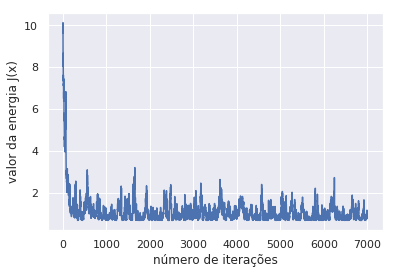

In [318]:
# plot das iterações de J
sns.lineplot(pts,todos_J)
plt.xlabel('número de iterações')
plt.ylabel('valor da energia J(x)')
plt.show()

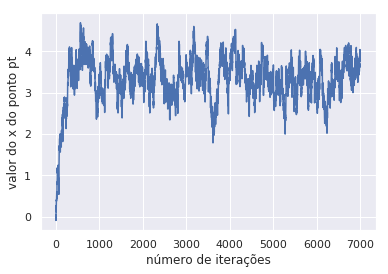

In [319]:
# plot das iterações de x do ponto pt
sns.lineplot(pts,todos_x_pt)
plt.xlabel('número de iterações')
plt.ylabel('valor do x do ponto pt')
plt.show()

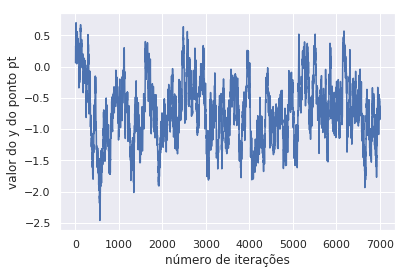

In [320]:
# plot das iterações de y do ponto pt

sns.lineplot(pts,todos_y_pt)
plt.xlabel('número de iterações')
plt.ylabel('valor do y do ponto pt')
plt.show()